# 数据读取

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签SimHei
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
pd.set_option('display.float_format',  '{:,.2f}'.format)
pd.set_option( 'display.precision',2)
%matplotlib inline

In [2]:
data = pd.read_csv("../data/energy.csv")
data.columns = ["time", "load", "temp"]

In [3]:
load = data['load'].values

<Axes: ylabel='Density'>

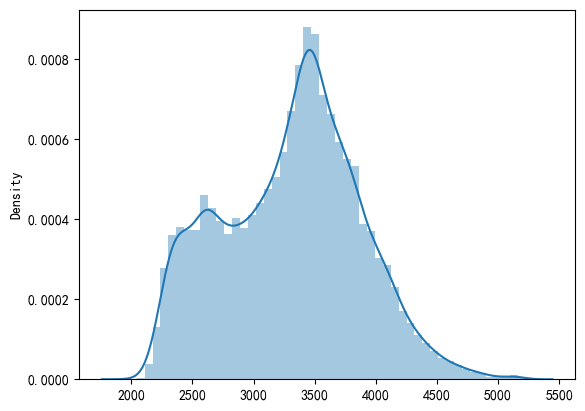

In [4]:
sns.distplot(load)

# 采样方法

In [5]:
# KL散度计算
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

def kl_plot(data1, data2):
    # 设定随机数种子
    np.random.seed(42)

    # 生成两个直方图
    hist1, bins1 = np.histogram(data1, bins=50, density=True) # hist等于频率/组距
    hist2, bins2 = np.histogram(data2, bins=50, density=True)

    # 计算每个区间的概率密度
    pdf1 = hist1 / np.sum(hist1)
    pdf2 = hist2 / np.sum(hist2)

    # 计算KL散度
    kl_divergence = entropy(pdf1, pdf2)

    # 打印结果
    print("KL散度:", kl_divergence)

    # 绘制直方图和概率密度函数
    plt.figure()
    plt.hist(data1, bins=bins1, density=True, alpha=0.3, color='#11b3b6', label='Data 1', histtype='stepfilled' )
    plt.hist(data2, bins=bins2, density=True, alpha=0.3, color='#f14643', label='Data 2', histtype='stepfilled')
    plt.legend() 
    plt.title('频率直方图')

    plt.figure()
    plt.plot((bins1[:-1] + bins1[1:]) / 2, pdf1, color='#11b3b6', linestyle='dashed', linewidth=2, label='PDF 1')
    plt.plot((bins2[:-1] + bins2[1:]) / 2, pdf2, color='#f14643', linestyle='dashed', linewidth=2, label='PDF 2')
    # 显示图例和标题
    plt.legend()
    plt.title('概率密度图')

    plt.show()
    
    return kl_divergence

In [17]:
from scipy.stats import ks_2samp
import numpy as np

def ks_test(data1, data2):
    # 进行KS检验
    statistic, p_value = ks_2samp(data1, data2)

    # 打印结果
    print("KS统计量:", statistic)
    print("P值:", p_value)

    # 判断是否拒绝原假设
    alpha = 0.05
    if p_value < alpha:
        print("拒绝原假设，两个样本来自不同分布")
    else:
        print("无法拒绝原假设，两个样本可能来自相同分布")
    return p_value

## 均匀采样

均匀采样是下采样的最常见方法之一。它可以均匀地从原始信号中选择一些样本，使采样率减小，从而减少采样后的数据量。在信号处理领域，均匀采样通常被视为理想的采样方式。

KL散度: inf


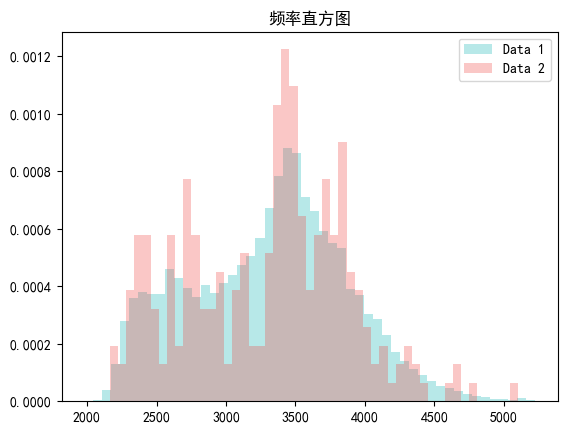

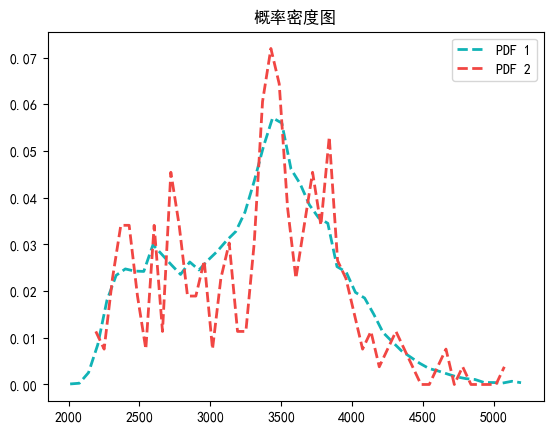

inf

In [27]:
# 均匀采样，每隔100个样本进行一次采样
x_downsampled = load[::100]
kl_plot(load, x_downsampled)

In [28]:
ks_test(load, x_downsampled)

KS统计量: 0.04824015704490159
P值: 0.5614598642065927
无法拒绝原假设，两个样本可能来自相同分布


0.5614598642065927

## 非均匀采样

KL散度: inf


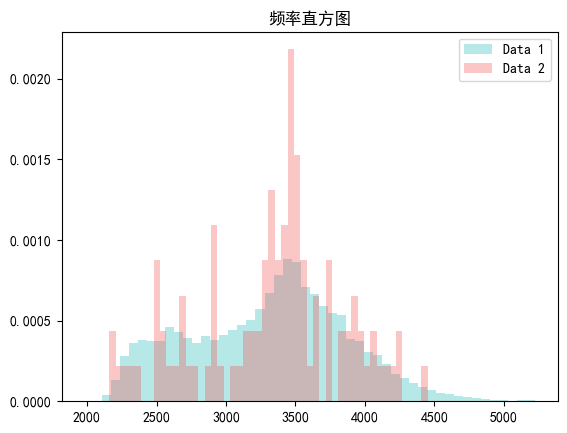

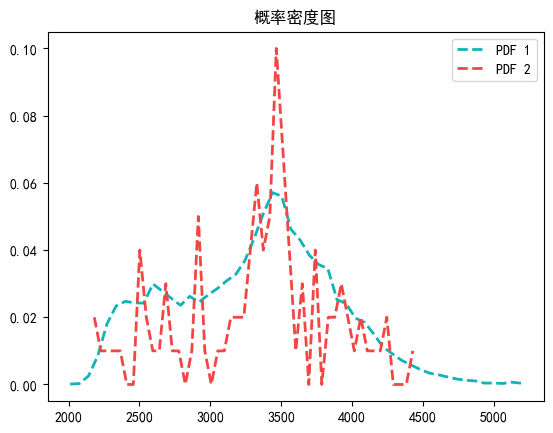

inf

In [32]:
# 随机采样，选择100个样本进行采样
nums = len(load)
idx = np.random.choice(range(nums), 100)
x_downsampled = load[idx]
kl_plot(load, x_downsampled)

## 分层随机采样

## OCSVM采样

## GSW采样

## LTTB采样